In [2]:
import numpy as np
import pandas as pd
%pylab inline
from datetime import datetime
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Reading different dataframes and dropping duplicates
accidents_12_14 = pd.read_csv('accidents_2012_to_2014.csv', low_memory=False)
accidents_09_11 = pd.read_csv('accidents_2009_to_2011.csv', low_memory=False)
accidents_05_07 = pd.read_csv('accidents_2005_to_2007.csv', low_memory=False)
accidents_12_14 = accidents_12_14.drop_duplicates()
accidents_09_11 = accidents_09_11.drop_duplicates()
accidents_05_07 = accidents_05_07.drop_duplicates()

In [4]:
# Concatenating 3 data frames to a single one
accidents = pd.concat([accidents_05_07, accidents_09_11, accidents_12_14])

In [5]:
# Deleted the column with NO details
accidents.drop('Junction_Detail', axis=1, inplace=True)

# Filling NA values for location as 0.0
accidents['Location_Easting_OSGR'].fillna(0.0, inplace=True)
accidents['Location_Northing_OSGR'].fillna(0.0, inplace=True)
accidents['Longitude'].fillna(0.0, inplace=True)
accidents['Latitude'].fillna(0.0, inplace=True)

In [6]:
# Filling missing values for categorical variables
accidents['Junction_Control'].fillna('Unknown', inplace=True)
accidents['Pedestrian_Crossing-Human_Control'].fillna('Unknown', inplace=True)
accidents['Pedestrian_Crossing-Physical_Facilities'].fillna('Unknown', inplace=True)
accidents['Weather_Conditions'].fillna('Unknown', inplace=True)
accidents['Road_Surface_Conditions'].fillna('Unknown', inplace=True)
accidents['Special_Conditions_at_Site'].fillna('Unknown', inplace=True)
accidents['Carriageway_Hazards'].fillna('Unknown', inplace=True)
accidents['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Unknown', inplace=True)
accidents['LSOA_of_Accident_Location'].fillna('Unknown', inplace=True)

In [7]:
accidents['Accident_Severity'].replace([1,2,3],['Fatal', 'Severe', 'Slight'], inplace=True)
accidents['Day_of_Week'].replace([1,2,3,4,5,6,7],['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], inplace=True)

In [8]:
# Find the mean value of the Hour in Time colums
t = accidents['Time'].map(str).map(lambda x: x.split(':')[0])
t = t[t != 'nan'].map(int)
int(ceil(t.mean()))

14

In [9]:
# Adding a new column 'hour' and replacing the 'nans' with the mean value
accidents['Hour'] = accidents['Time'].map(str).map(lambda x: x.split(':')[0])
accidents['Hour'].replace('nan', 14, inplace= True)
accidents['Hour'] = accidents['Hour'].map(int)
accidents.drop('Time', inplace=True, axis=1)

In [10]:
# Converting Date column into Date time
accidents['Date'] = pd.to_datetime(accidents['Date'], dayfirst=True)

In [11]:
# Function to check if the weather is windy or not
def isWindy(weather):
    if 'with high winds' in weather:
        return 'Yes'
    elif 'without high winds' in weather:
        return 'No'
    else:
        return "Unknown"

In [12]:
# Adding a new column to capture the effect of wind separately
accidents['Wind'] = accidents['Weather_Conditions'].map(isWindy)

In [13]:
# Splitting Weather Conditions and taking the first word. Adding a new column
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].map(lambda x: x.split()[0])
accidents['Weather_Conditions'].replace('Other', 'Unknown', inplace=True)

In [14]:
accidents = accidents.reset_index().drop('index', axis=1)

In [15]:
accidents.shape

(1469995, 33)

In [16]:
accidents.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
1469990,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,Severe,2,1,2014-12-07,...,Snowing,Snow,None,None,2,Yes,Unknown,2014,22,No
1469991,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,Slight,2,2,2014-12-11,...,Fine,Snow,None,None,2,Yes,Unknown,2014,6,No
1469992,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,Slight,1,1,2014-12-09,...,Fine,Frost/Ice,None,None,2,Yes,Unknown,2014,2,No
1469993,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,Severe,3,2,2014-12-17,...,Raining,Wet/Damp,None,None,2,Yes,Unknown,2014,6,No
1469994,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,Slight,2,2,2014-12-24,...,Fine,Wet/Damp,None,None,2,Yes,Unknown,2014,15,No


In [17]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469995 entries, 0 to 1469994
Data columns (total 33 columns):
Accident_Index                                 1469995 non-null object
Location_Easting_OSGR                          1469995 non-null float64
Location_Northing_OSGR                         1469995 non-null float64
Longitude                                      1469995 non-null float64
Latitude                                       1469995 non-null float64
Police_Force                                   1469995 non-null int64
Accident_Severity                              1469995 non-null object
Number_of_Vehicles                             1469995 non-null int64
Number_of_Casualties                           1469995 non-null int64
Date                                           1469995 non-null datetime64[ns]
Day_of_Week                                    1469995 non-null object
Local_Authority_(District)                     1469995 non-null int64
Local_Authority_(Highway)  

In [18]:
# All nulls have been removed
sum(accidents.isna())

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

In [19]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,Severe,1,1,2005-01-04,...,Raining,Wet/Damp,None,None,1,Yes,E01002849,2005,17,No
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,Slight,1,1,2005-01-05,...,Fine,Dry,None,None,1,Yes,E01002909,2005,17,No
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,Slight,2,1,2005-01-06,...,Fine,Dry,None,None,1,Yes,E01002857,2005,0,No
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,Slight,1,1,2005-01-07,...,Fine,Dry,None,None,1,Yes,E01002840,2005,10,No
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,Slight,1,1,2005-01-10,...,Fine,Wet/Damp,None,None,1,Yes,E01002863,2005,21,No


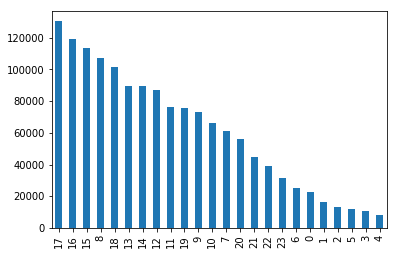

In [20]:
accidents['Hour'].value_counts().plot(kind='bar')

In [21]:
accidents['Accident_Severity'].value_counts()

Slight    1252034
Severe     198920
Fatal       19041
Name: Accident_Severity, dtype: int64

In [22]:
accidents['Year'].value_counts()

2005    198732
2006    189161
2007    182115
2009    163553
2010    154414
2011    151470
2014    146320
2012    145571
2013    138659
Name: Year, dtype: int64

In [23]:
accidents['Light_Conditions'].replace('Darkeness: No street lighting', 'Darkness: No street lighting', inplace=True)

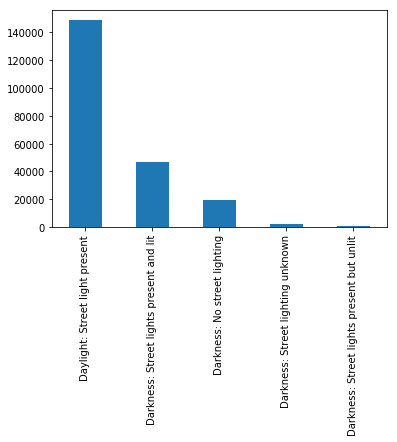

In [24]:
fatal_sev_mask = accidents['Accident_Severity'] != 'Slight' 
fatal_sev = accidents[fatal_sev_mask]
fatal_sev['Light_Conditions'].value_counts().plot(kind='bar')

### Most accidents happen in daylight or lights present and lit.

In [25]:
# percent of fatal and severe accidents in daylight
light_mask = fatal_sev['Light_Conditions'] == 'Daylight: Street light present'
print float(len(fatal_sev[light_mask]))/len(fatal_sev)

0.6816494694


In [26]:
#percent dark
print float(len(fatal_sev[~light_mask]))/len(fatal_sev)

0.3183505306


In [27]:
# percent fatal in light
fatal_mask = fatal_sev['Accident_Severity'] == 'Fatal'
print float(len(fatal_sev[fatal_mask & light_mask]))/len(fatal_sev[light_mask])

0.0754578557342


In [28]:
# percent fatal in dark
print float(len(fatal_sev[fatal_mask & ~light_mask]))/len(fatal_sev[~light_mask])

0.112843719375


### Higher percentage of serious accidents in the dark are fatal.

Darkness: Street lights present and lit      46780
Darkness: No street lighting                 19312
Darkness: Street lighting unknown             2176
Darkness: Street lights present but unlit     1120
Name: Light_Conditions, dtype: int64


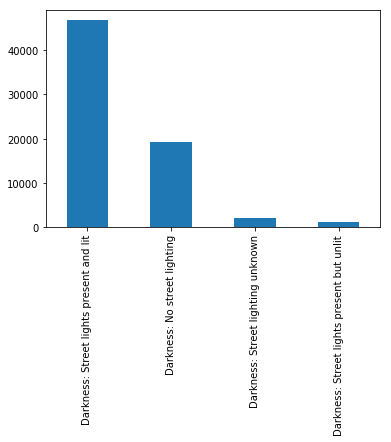

In [29]:
dark_acc = fatal_sev[~light_mask]
dark_acc['Light_Conditions'].value_counts().plot(kind='bar')
print dark_acc['Light_Conditions'].value_counts()

### Most accidents in the dark happen when street lights are lit.

In [30]:
fatal_sev.groupby("Light_Conditions")['Speed_limit'].mean().to_frame()

,Speed_limit
Light_Conditions,
Darkness: No street lighting,57.640327
Darkness: Street lighting unknown,39.397978
Darkness: Street lights present and lit,34.610090
Darkness: Street lights present but unlit,39.741071
Daylight: Street light present,41.337120


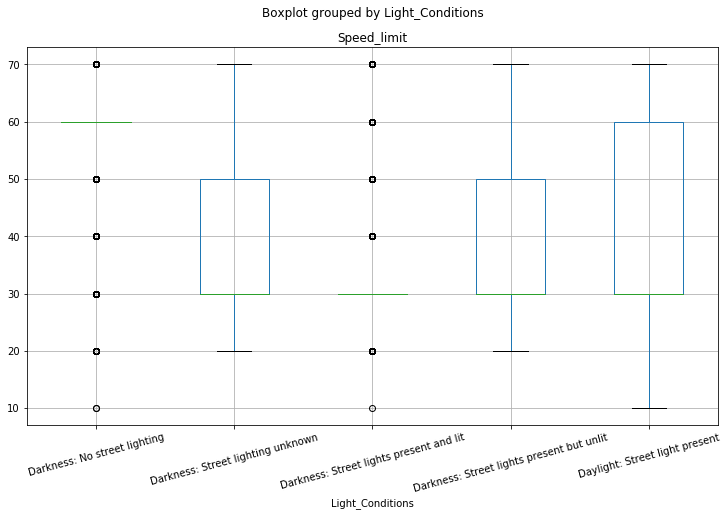

In [31]:
fatal_sev.boxplot(column="Speed_limit", by="Light_Conditions", figsize=(12,7), rot=15)

### Higher mean speed limit in darkness with no street lighting. Type of road?

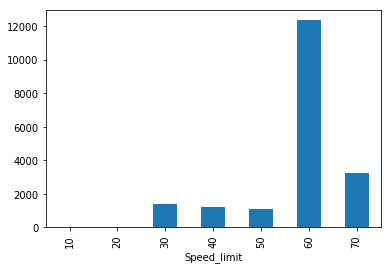

In [32]:
unlit = dark_acc['Light_Conditions'] == 'Darkness: No street lighting'
dark_acc[unlit].groupby('Speed_limit')['Light_Conditions'].count().plot(kind='bar')

### 60 is the most common speed limit on these roads

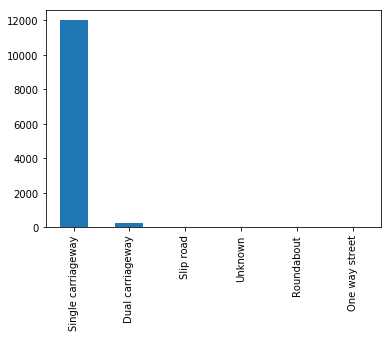

In [33]:
unlit_acc = dark_acc[unlit]
sl_60 = unlit_acc['Speed_limit'] == 60
unlit_acc[sl_60]['Road_Type'].value_counts().plot(kind='bar')

### Seems single carriageway is the most common type of road.

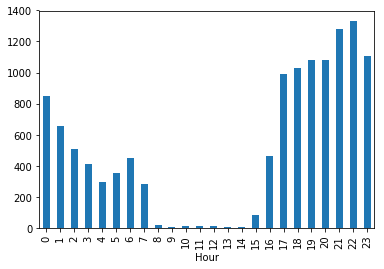

In [34]:
unlit_acc[sl_60].groupby('Hour')['Accident_Index'].agg('count').plot(kind='bar')

### Most of the unlit accidents happen between 5PM and Midnight.

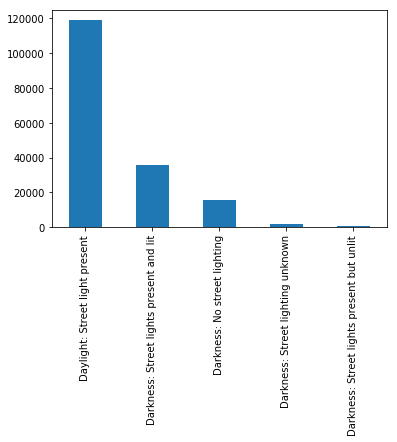

In [35]:
carriage_mask = fatal_sev['Road_Type'] == 'Single carriageway'
fatal_sev[carriage_mask]['Light_Conditions'].value_counts().plot(kind='bar')

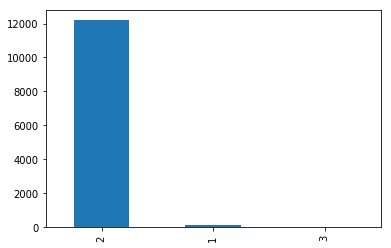

In [36]:
unlit_acc[sl_60]['Urban_or_Rural_Area'].value_counts().plot(kind='bar')

In [37]:
fatal_sev[carriage_mask].groupby('Light_Conditions')['Speed_limit'].mean()

Light_Conditions
Darkness: No street lighting                 55.242762
Darkness: Street lighting unknown            37.073171
Darkness: Street lights present and lit      32.177383
Darkness: Street lights present but unlit    36.000000
Daylight: Street light present               39.669136
Name: Speed_limit, dtype: float64

In [38]:
fatal_sev[carriage_mask].groupby('Light_Conditions')['Number_of_Vehicles'].mean()

Light_Conditions
Darkness: No street lighting                 1.542911
Darkness: Street lighting unknown            1.574913
Darkness: Street lights present and lit      1.579342
Darkness: Street lights present but unlit    1.553293
Daylight: Street light present               1.721704
Name: Number_of_Vehicles, dtype: float64

In [39]:
fatal_sev[carriage_mask & light_mask]['Number_of_Vehicles'].value_counts()

2     60540
1     47374
3      8668
4      1747
5       405
6       133
7        37
8        16
10        5
9         5
13        1
Name: Number_of_Vehicles, dtype: int64

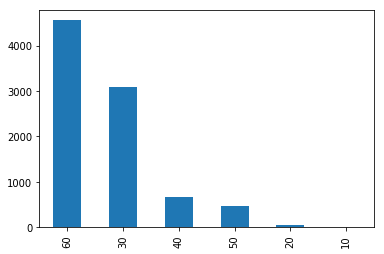

In [40]:
fatal_sev[carriage_mask & light_mask & fatal_mask]['Speed_limit'].value_counts().plot(kind='bar')

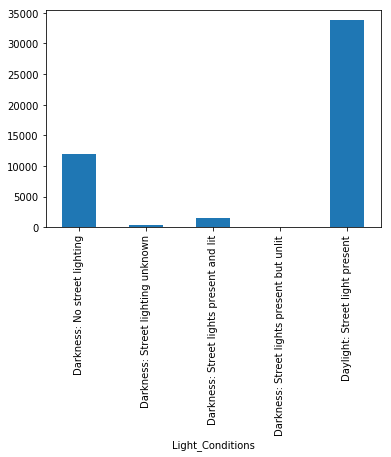

In [41]:
speed_60 = fatal_sev['Speed_limit'] == 60
fatal_sev[speed_60 & carriage_mask].groupby('Light_Conditions')['Speed_limit'].count().plot(kind='bar')

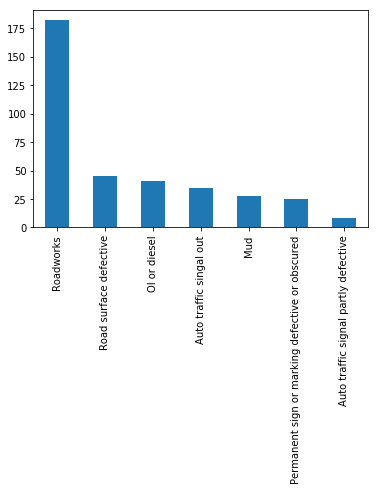

In [59]:
spec_cond = (fatal_sev['Special_Conditions_at_Site']  != 'None') & (fatal_sev['Special_Conditions_at_Site']  != 'Unknown')
fatal_sev[spec_cond & fatal_mask]['Special_Conditions_at_Site'].value_counts().plot(kind='bar')

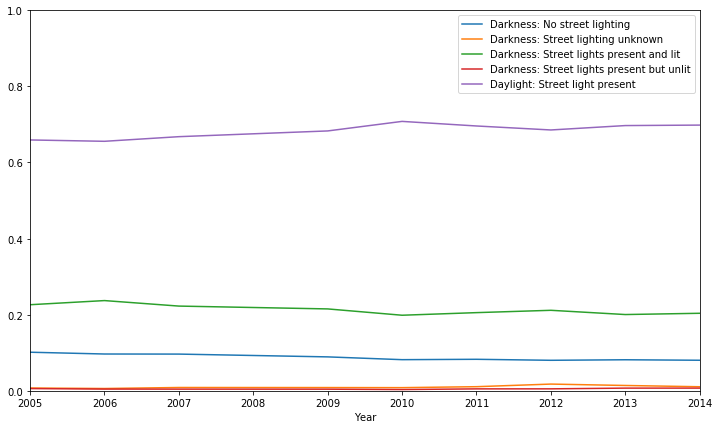

In [43]:
year_light_crosstab = pd.crosstab(index=fatal_sev['Year'], columns=fatal_sev['Light_Conditions'], normalize='index')
year_light_crosstab.head()
year_light_crosstab.plot(figsize=(12,7)).set_ylim([0,1])
legend(loc='upper right')


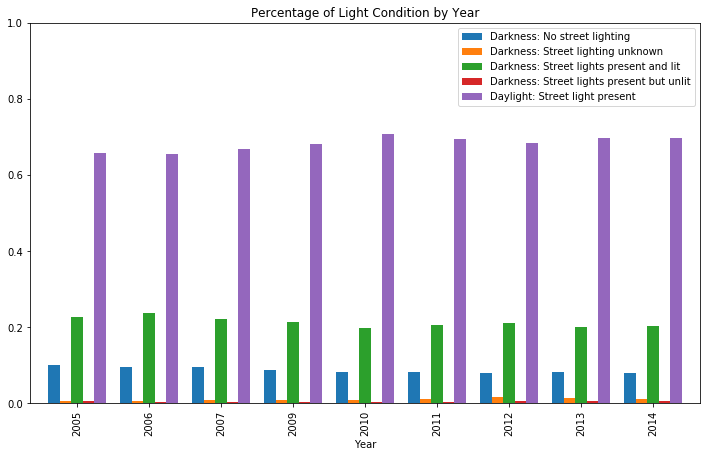

In [44]:
year_light_crosstab.plot(kind='bar', figsize=(12,7), width=.8, title='Percentage of Light Condition by Year').set_ylim([0,1])
legend(loc='upper right')

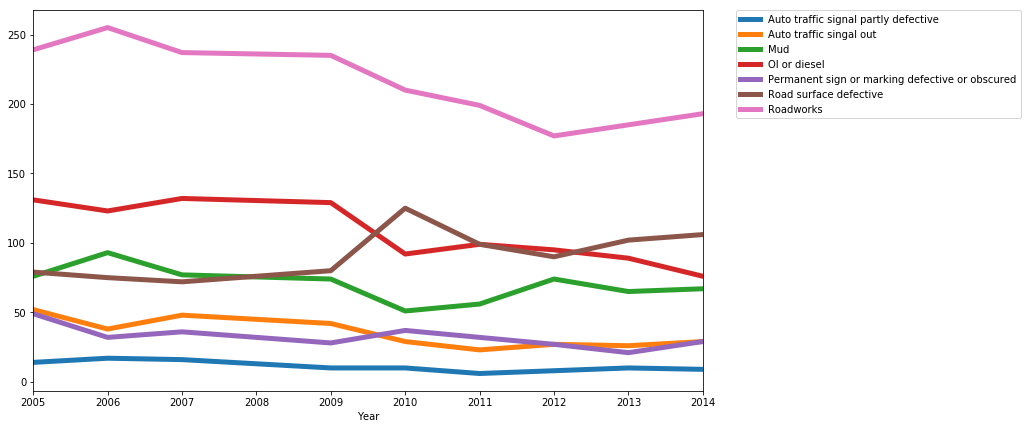

In [45]:
year_cond_crosstab = pd.crosstab(index=fatal_sev[spec_cond]['Year'], columns=fatal_sev[spec_cond]['Special_Conditions_at_Site'])#, normalize='index')
year_cond_crosstab.plot(figsize=(12,7), linewidth=5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

In [46]:
hm = fatal_sev.copy()
hm['Day_of_Week'].replace(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],[1,2,3,4,5,6,7], inplace=True)

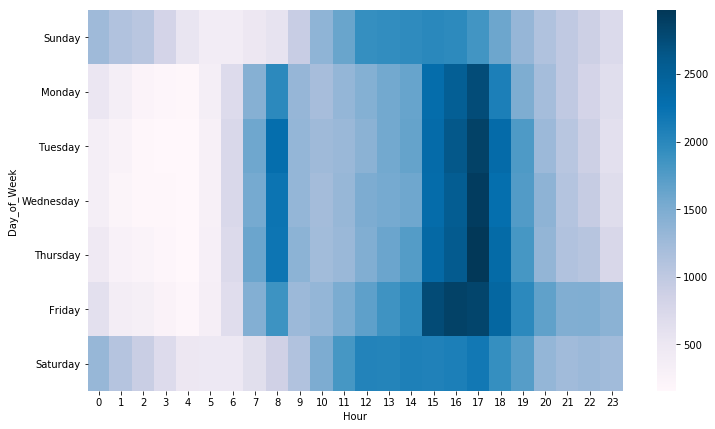

In [55]:
year_day = pd.crosstab(index=hm['Day_of_Week'], columns=hm['Hour'])
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
figure(figsize=(12,7))
sns.heatmap(year_day, cmap="PuBu", yticklabels=order)

In [48]:
len(fatal_sev)

217961

In [49]:
fatal_sev['Urban_or_Rural_Area'].value_counts()

1    122164
2     95780
3        17
Name: Urban_or_Rural_Area, dtype: int64

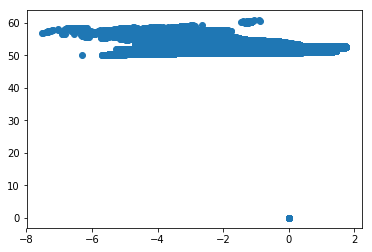

In [50]:
scatter(fatal_sev['Longitude'], fatal_sev['Latitude'])

In [51]:
lit = fatal_sev['Light_Conditions'] == 'Darkness: Street lights present and lit'
fatal_sev[lit]['Road_Type'].value_counts()

Single carriageway    35832
Dual carriageway       6963
Roundabout             2442
One way street         1102
Slip road               302
Unknown                 139
Name: Road_Type, dtype: int64

In [52]:
fatal_light_crosstab = pd.crosstab(index=fatal_sev['Light_Conditions'], columns=fatal_sev['Accident_Severity'], normalize='index')
fatal_light_crosstab

Accident_Severity,Fatal,Severe
Light_Conditions,,
Darkness: No street lighting,0.184134,0.815866
Darkness: Street lighting unknown,0.085938,0.914062
Darkness: Street lights present and lit,0.084673,0.915327
Darkness: Street lights present but unlit,0.112500,0.887500
Daylight: Street light present,0.075458,0.924542


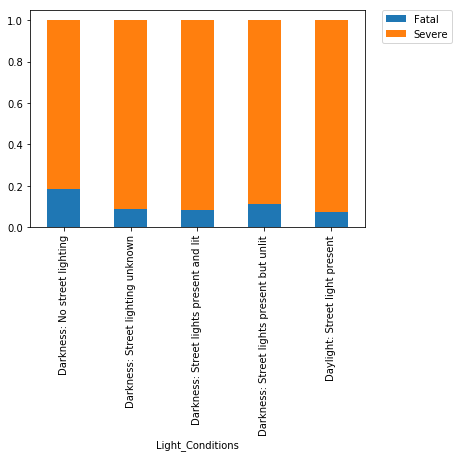

In [53]:
fatal_light_crosstab.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()


In [54]:
junc_speed_ct = pd.crosstab(index=fatal_sev['Junction_Control'], columns=fatal_sev['Speed_limit'], normalize='index')
junc_speed_ct

Speed_limit,10,20,30,40,50,60,70
Junction_Control,,,,,,,
Authorised person,0.000000,0.011719,0.718750,0.066406,0.039062,0.136719,0.027344
Automatic traffic signal,0.000000,0.009631,0.812934,0.119107,0.024827,0.019442,0.014058
Giveway or uncontrolled,0.000000,0.012457,0.682694,0.079541,0.030095,0.159864,0.035350
Stop Sign,0.000000,0.014881,0.583333,0.103175,0.044643,0.245040,0.008929
Unknown,0.000038,0.010236,0.417548,0.079743,0.045137,0.335623,0.111675


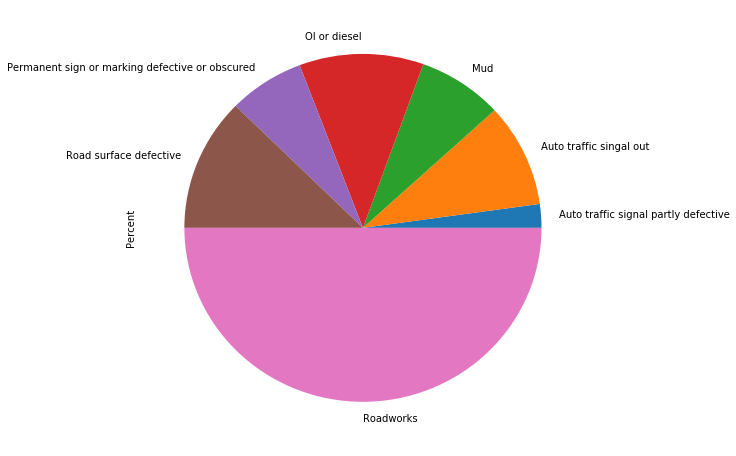

In [70]:
spec_cond_perc = pd.crosstab(index=fatal_sev[spec_cond & fatal_mask]['Special_Conditions_at_Site'], columns=fatal_sev['Year'])
spec_cond_perc['Sum'] = spec_cond_perc.apply(sum, axis=1)
spec_cond_perc['Sum'].sum()
spec_cond_perc['Percent'] = spec_cond_perc['Sum'] / spec_cond_perc['Sum'].sum()
spec_cond_perc['Percent'].plot(kind='pie', figsize=(8,8))